In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
dt=pd.read_csv("delivery_time.csv")
dt.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


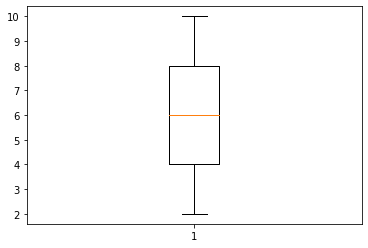

In [2]:
plt.boxplot(dt.SortingTime)
dt.describe()

In [36]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DeliveryTime    21 non-null     float64
 1   SortingTime     21 non-null     int64  
 2   SortingTime_Sq  21 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 632.0 bytes


In [37]:
dt.describe()

,DeliveryTime,SortingTime,SortingTime_Sq
count,21.000000,21.000000,21.000000
mean,16.790952,6.190476,44.476190
std,5.074901,2.542028,32.265491
min,8.000000,2.000000,4.000000
25%,13.500000,4.000000,16.000000
50%,17.830000,6.000000,36.000000
75%,19.750000,8.000000,64.000000
max,29.000000,10.000000,100.000000


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

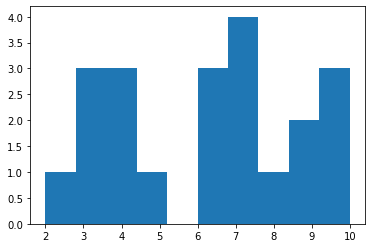

In [3]:
plt.hist(dt.SortingTime)

{'whiskers': [<matplotlib.lines.Line2D at 0x179071683d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17907168a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x17907168070>],
 'medians': [<matplotlib.lines.Line2D at 0x17907173190>],
 'fliers': [<matplotlib.lines.Line2D at 0x179071734f0>],
 'means': []}

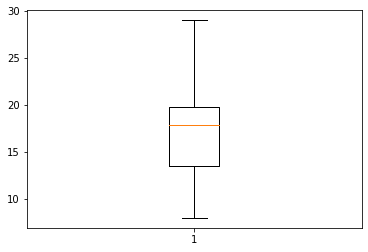

In [4]:
plt.boxplot(dt.DeliveryTime)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

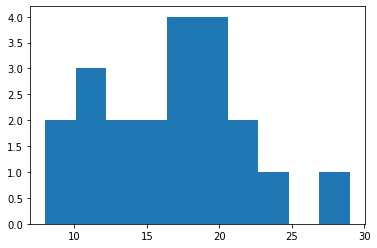

In [5]:
plt.hist(dt.DeliveryTime)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

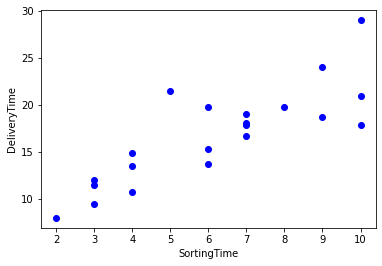

In [6]:
plt.plot(dt.SortingTime,dt.DeliveryTime,"bo")
plt.xlabel("SortingTime")
plt.ylabel("DeliveryTime")
help(plt.plot)

In [7]:
dt.DeliveryTime.corr(dt.SortingTime)

0.8259972607955326

In [8]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=dt).fit()
model.params 

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        11:40:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(model.resid)
print(model.resid_pearson)

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64
[-0.70630355  0.10943679  1.11524837  0.87774154  2.01950985 -0.383949
  0.2978383  -0.69160484 -1.76255624 -0.9110735   0.01877637 -0.82756157
 -0.49264758 -0.0101515   0.17043364  0.5796396  -0.92911167 -0.00540844
 -0.64082979 -0.10081191  2.27338512]


In [11]:
print(model.conf_int(0.05))

                    0          1
Intercept    2.979134  10.186334
SortingTime  1.108673   2.189367


In [12]:
pred=model.predict(dt.iloc[:,1])
pred
pd.set_option("display.max_rows",None)
pred
rmse_lin=np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'Dtime')

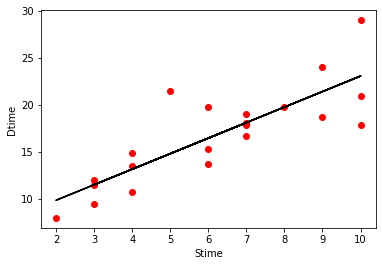

In [13]:
import matplotlib.pylab as plt
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='red')
plt.plot(dt['SortingTime'],pred,color='black')
plt.xlabel('Stime')
plt.ylabel('Dtime')

In [14]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=dt).fit()
model2.params
model2.resid 
model2.resid_pearson 
 

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [15]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        11:40:54   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred2 = model2.predict(pd.DataFrame(dt['SortingTime'])) 

In [17]:
pred2
rmse_log=np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred2))**2))
rmse_log

2.733171476682066

In [18]:
pred2.corr(dt.DeliveryTime)

0.8339325279256244

Text(0, 0.5, 'DeliveryTime')

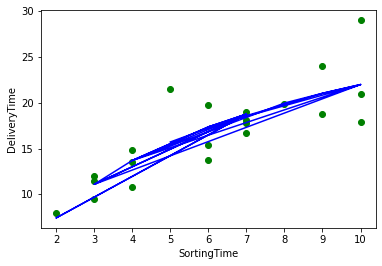

In [19]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='green')
plt.plot(dt['SortingTime'],pred2,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [20]:
model3=smf.ols('np.log(DeliveryTime)~SortingTime',data=dt).fit()
model3.params

Intercept      2.121372
SortingTime    0.105552
dtype: float64

In [21]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 19 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                          11:40:55   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
pred_log=model3.predict(pd.DataFrame(dt['SortingTime']))

In [23]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [24]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [25]:
rmse_exp=np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred3))**2))
rmse_exp

2.940250323056201

In [26]:
pred3.corr(dt.DeliveryTime)

0.808578010828926

Text(0, 0.5, 'DeliveryTime')

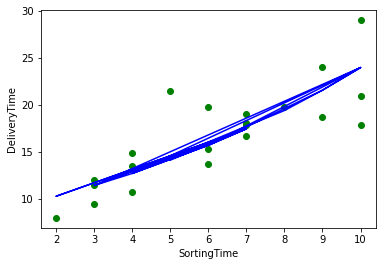

In [27]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='green')
plt.plot(dt.SortingTime,pred3,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [28]:
student_resid=model3.resid_pearson
student_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

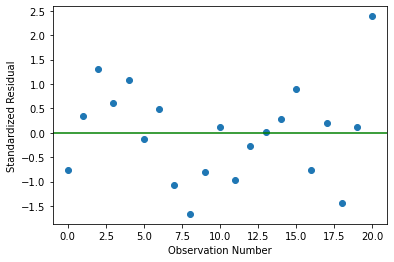

In [29]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

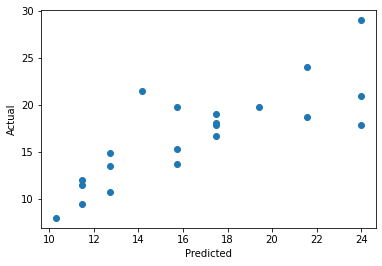

In [30]:
plt.scatter(x=pred3,y=dt.DeliveryTime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [31]:
dt["SortingTime_Sq"] = dt.SortingTime*dt.SortingTime
dt  

,DeliveryTime,SortingTime,SortingTime_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [32]:
model_quad = smf.ols("np.log(DeliveryTime)~SortingTime+SortingTime_Sq",data=dt).fit()
model_quad.params 

Intercept         1.699704
SortingTime       0.265922
SortingTime_Sq   -0.012841
dtype: float64

In [33]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Fri, 19 Mar 2021   Prob (F-statistic):           2.20e-06
Time:                          11:40:56   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred_quad = model_quad.predict(dt)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4
rmse_quad = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred4))**2))
rmse_quad  

2.799041988740925

AttributeError: 'DataFrame' object has no attribute 'sSortingTime'

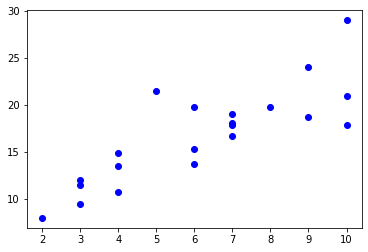

In [35]:
plt.scatter(dt.SortingTime,dt.DeliveryTime,c="b")
plt.plot(dt.sSortingTime,pred4,"r") 

In [ ]:
plt.scatter(np.arange(10),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [ ]:
plt.hist(model_quad.resid_pearson)

In [ ]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

In [ ]:
print(plt.style.available) 

In [ ]:
import matplotlib.pyplot as plt
>>> plt.style.use('dark_background')  

In [ ]:
plt.hist(model_quad.resid_pearson)

In [ ]:
plt.scatter(dt.SortingTime,dt.DeliveryTime,c="b")
plt.plot(dt.SortingTime,pred4,"r") 